<a href="https://colab.research.google.com/github/DivyarajSunva/Data-Science-and-Business-Analyst/blob/main/Task_1_Prediction_of_marks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Name : Divyarajsinh Sunva





###GRIP @ The Sparks Foundation #GRIPJUNE2023





### Task 1 : Prediction Using Supervised Machine Learning

---



AIM : To predict the percentage of an student based on the no. of hours studied.

##Step - 1 : Importing the Libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Step - 2 : Loading the dataset into python environment.

In [4]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

print("Data is Imported")


Data is Imported


##Step - 3 : Descriptive Statistics of the dataset.

In [5]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [20]:
print(data.isnull().mean())

Hours     0.0
Scores    0.0
dtype: float64


There are no missing or null values present in the dataset.

##Step - 4 : Data Visualization

In [9]:
#Importing the libraries
import seaborn as sns
import pickle
import os
%matplotlib inline

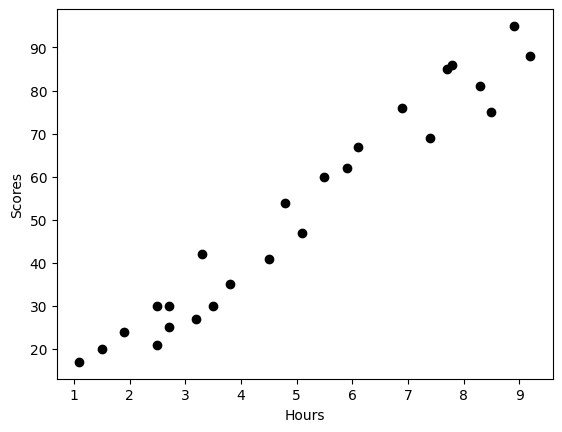

In [23]:
plt.scatter(data["Hours"], data["Scores"], c='black')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

Marks Scored by a student is linearly dependent on the number of hours studied by the student.

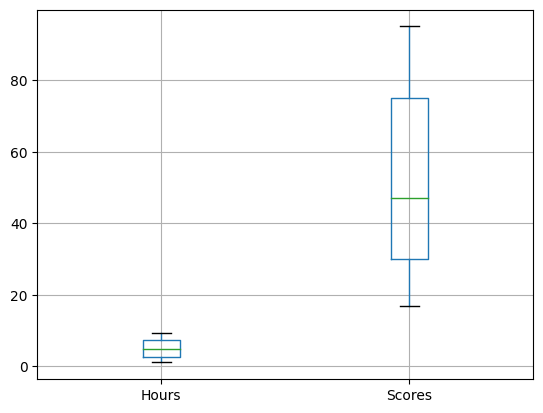

In [22]:
#Checking Outliers in the data
data.boxplot()
plt.show()

##Step - 5 : Data Preparation

In [24]:
X = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values.reshape(-1,1)

##Step - 6 : Model Creation

In [12]:
#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## Step - 7 : Making Predictions.

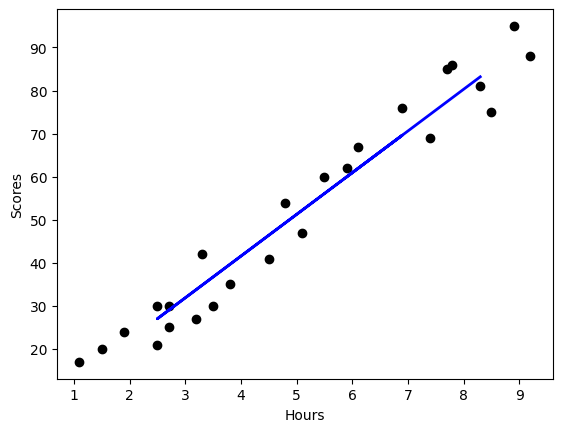

In [14]:
#predicting the Test set result
y_pred = reg.predict(X_test)

plt.scatter(X, y, c='black')
plt.plot(
    X_test,
    y_pred,
    c='blue',
    linewidth=2
)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [28]:
#Comparing Actual vs Predicted
data["pred_scores"] = reg.predict(data[["Hours"]])
data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Hours,Scores,pred_scores
0,2.5,21,27.032088
1,5.1,47,52.205491
2,3.2,27,33.809542
3,8.5,75,85.124557
4,3.5,30,36.714166
5,1.5,20,17.350010
6,9.2,88,91.902011
7,5.5,60,56.078322
8,8.3,81,83.188141
9,2.7,25,28.968503


In [16]:
#Calculating the Coefficients
reg.coef_

array([[9.68207815]])

In [17]:
#Calculating the Intercept
reg.intercept_

array([2.82689235])

#**Predicted Score if a student studies for 9.25 hrs/Day**

In [19]:
output = reg.predict([[9.25]]).flatten()
output[0]

92.38611528261494

## Step - 8 : Evaluation of Model

In [29]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288
R2 Score:  0.9678055545167994
